Importing Needed Packages

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import seaborn as sns
from datetime import datetime, timedelta 

import sklearn
from sklearn import preprocessing
from statsmodels.tsa.arima.model import ARIMA 
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA 
from sklearn.metrics import r2_score
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf




%matplotlib inline

Loading the dataset

In [4]:
df=pd.read_csv(r"bengaluru.csv",index_col='date_time')


Finding null values

In [5]:
df.isnull().sum()

maxtempC             0
mintempC             0
totalSnow_cm         0
sunHour              0
uvIndex              0
uvIndex.1            0
moon_illumination    0
moonrise             0
moonset              0
sunrise              0
sunset               0
DewPointC            0
FeelsLikeC           0
HeatIndexC           0
WindChillC           0
WindGustKmph         0
humidity             0
precipMM             0
pressure             0
tempC                0
visibility           0
winddirDegree        0
windspeedKmph        0
dtype: int64

Finding Duplicates Value

In [6]:
df.duplicated().sum()

np.int64(47)

In [7]:
df.index

Index(['01-01-2009 00:00', '01-01-2009 01:00', '01-01-2009 02:00',
       '01-01-2009 03:00', '01-01-2009 04:00', '01-01-2009 05:00',
       '01-01-2009 06:00', '01-01-2009 07:00', '01-01-2009 08:00',
       '01-01-2009 09:00',
       ...
       '31-12-2018 14:00', '31-12-2018 15:00', '31-12-2018 16:00',
       '31-12-2018 17:00', '31-12-2018 18:00', '31-12-2018 19:00',
       '31-12-2018 20:00', '31-12-2018 21:00', '31-12-2018 22:00',
       '31-12-2018 23:00'],
      dtype='object', name='date_time', length=87648)

In [8]:
df.shape

(87648, 23)

In [9]:
df.tail()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,sunrise,...,HeatIndexC,WindChillC,WindGustKmph,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
date_time,,,,,,,,,,,,,,,,,,,,,
31-12-2018 19:00,25,17,0,11.6,6,1,36,1:37 AM,1:47 PM,6:41 AM,...,20,20,22,52,0.0,1019,20,10,57,13
31-12-2018 20:00,25,17,0,11.6,6,1,36,1:37 AM,1:47 PM,6:41 AM,...,19,19,19,57,0.0,1019,19,10,63,13
31-12-2018 21:00,25,17,0,11.6,6,1,36,1:37 AM,1:47 PM,6:41 AM,...,19,19,17,61,0.0,1019,18,10,69,12
31-12-2018 22:00,25,17,0,11.6,6,1,36,1:37 AM,1:47 PM,6:41 AM,...,18,18,16,66,0.0,1019,18,10,75,12
31-12-2018 23:00,25,17,0,11.6,6,1,36,1:37 AM,1:47 PM,6:41 AM,...,18,18,16,70,0.0,1019,18,10,81,12


In [10]:
df.dtypes

maxtempC               int64
mintempC               int64
totalSnow_cm           int64
sunHour              float64
uvIndex                int64
uvIndex.1              int64
moon_illumination      int64
moonrise              object
moonset               object
sunrise               object
sunset                object
DewPointC              int64
FeelsLikeC             int64
HeatIndexC             int64
WindChillC             int64
WindGustKmph           int64
humidity               int64
precipMM             float64
pressure               int64
tempC                  int64
visibility             int64
winddirDegree          int64
windspeedKmph          int64
dtype: object

Droping totalSnow_cm which have null values

In [11]:
df=df.drop('totalSnow_cm', axis=1)
df=df.drop('moonrise', axis=1)
df=df.drop('moonset', axis=1)
df=df.drop('sunrise', axis=1)
df=df.drop('sunset', axis=1)

Inserting column country to specify data 

In [12]:
# df.insert(loc=0, column='country', value='India')

Converting column values to lower

In [13]:
df.columns = df.columns.str.lower()

Converting Index type from String to Date and time 

In [14]:
df.index = pd.to_datetime(df.index, format='%d-%m-%Y %H:%M')

In [15]:
print("Index Type:", type(df.index))

Index Type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>


Creating a Heat map

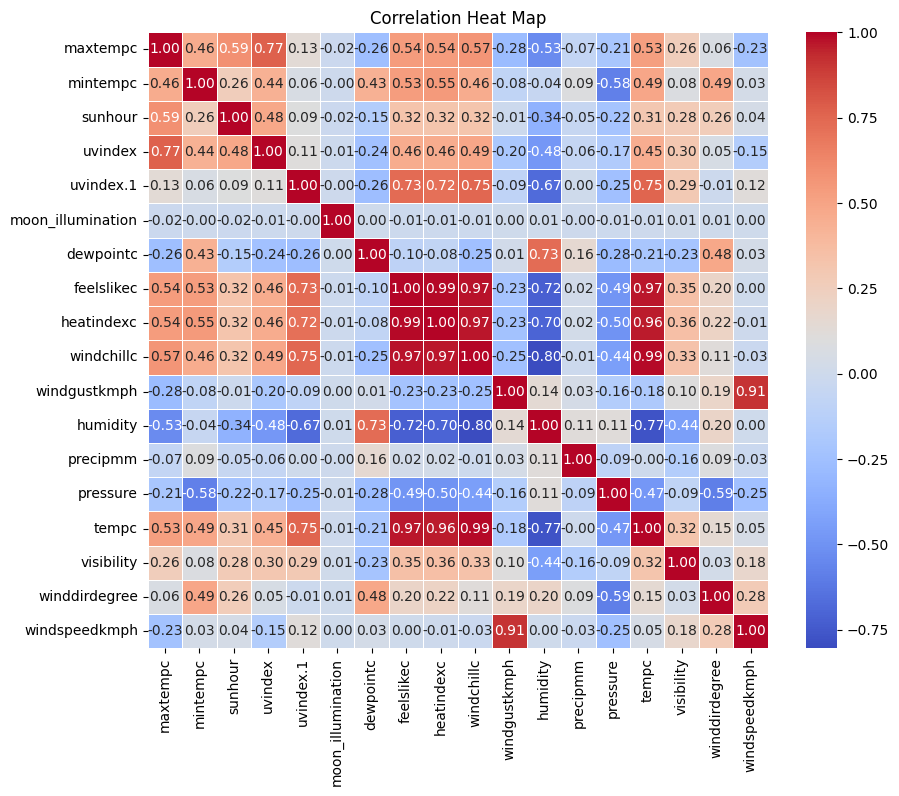

In [16]:
#Storing temperature column in different dataset
# df_num=df.loc[:,['maxtempc','mintempc','cloudcover','humidity','tempc','sunhour','heatindexc','precipmm','pressure','windspeedkmph']]
# df_num.index = pd.to_datetime(df_num.index, format='%d-%m-%Y %H:%M')
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heat map
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heat Map')
plt.show()

Ploting histogram for each columns

array([[<Axes: title={'center': 'maxtempc'}>,
        <Axes: title={'center': 'mintempc'}>,
        <Axes: title={'center': 'sunhour'}>,
        <Axes: title={'center': 'uvindex'}>],
       [<Axes: title={'center': 'uvindex.1'}>,
        <Axes: title={'center': 'moon_illumination'}>,
        <Axes: title={'center': 'dewpointc'}>,
        <Axes: title={'center': 'feelslikec'}>],
       [<Axes: title={'center': 'heatindexc'}>,
        <Axes: title={'center': 'windchillc'}>,
        <Axes: title={'center': 'windgustkmph'}>,
        <Axes: title={'center': 'humidity'}>],
       [<Axes: title={'center': 'precipmm'}>,
        <Axes: title={'center': 'pressure'}>,
        <Axes: title={'center': 'tempc'}>,
        <Axes: title={'center': 'visibility'}>],
       [<Axes: title={'center': 'winddirdegree'}>,
        <Axes: title={'center': 'windspeedkmph'}>, <Axes: >, <Axes: >]],
      dtype=object)

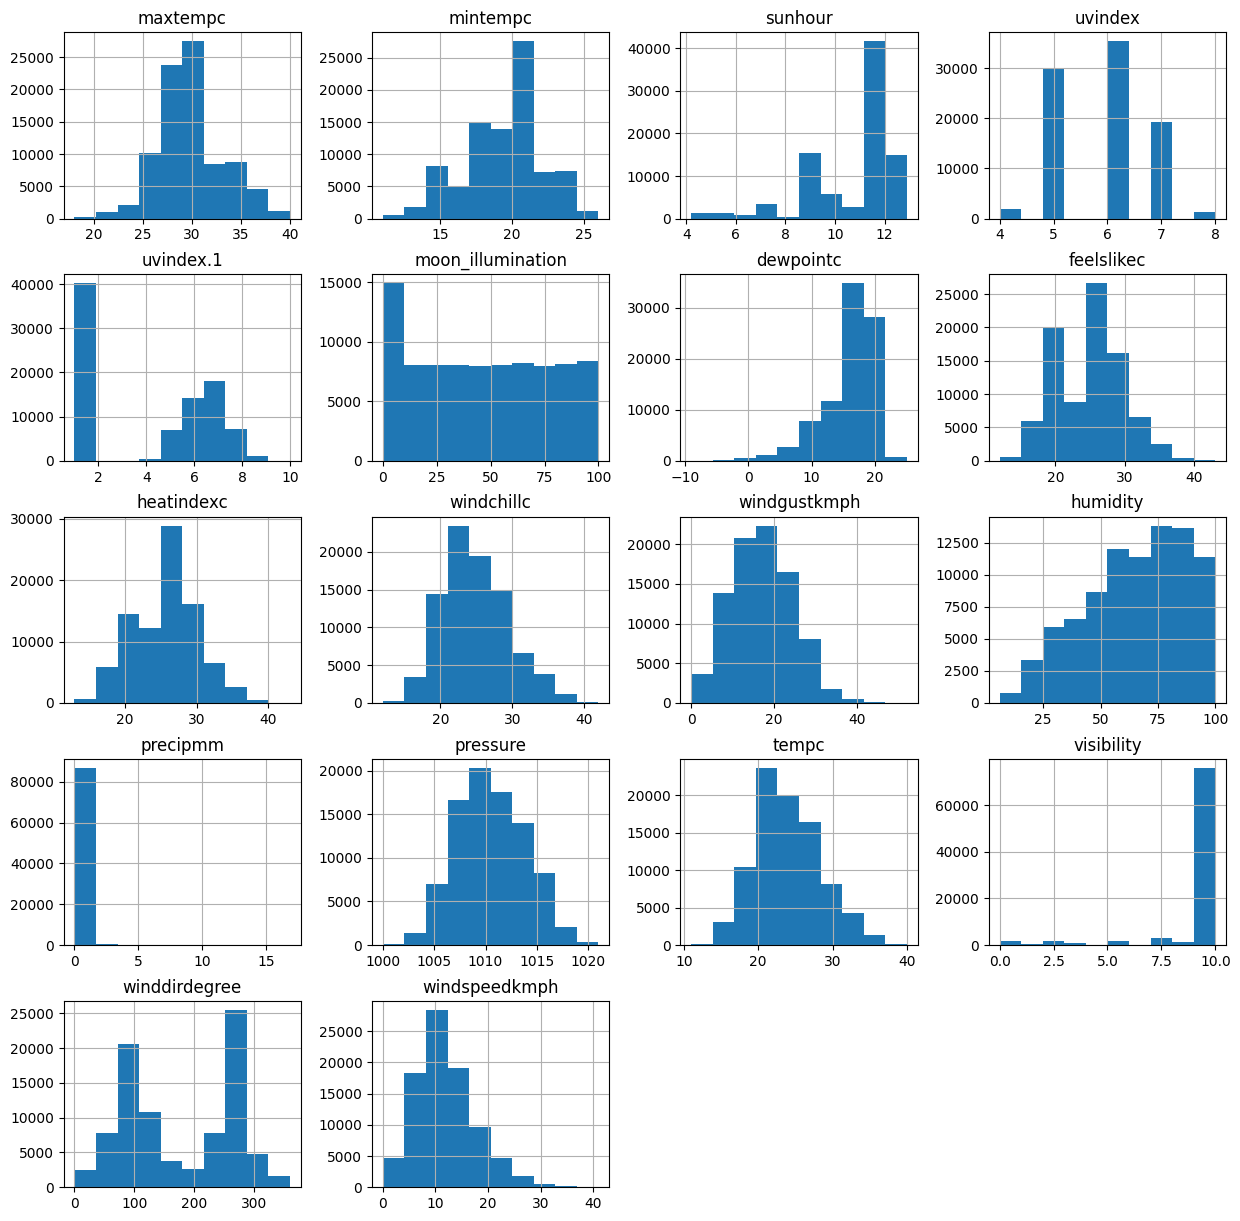

In [17]:
df.hist(bins=10,figsize=(15,15))

C:\Users\Teesha\AppData\Local\Temp\ipykernel_15700\964755536.py:1: FutureWarning: DatetimeIndexResampler.fillna is deprecated and will be removed in a future version. Use obj.ffill(), obj.bfill(), or obj.nearest() instead.
  df['2017':'2018'].resample('D').fillna(method='pad').plot(subplots=True, figsize=(25,20))


array([<Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>,
       <Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>,
       <Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>,
       <Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>,
       <Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>,
       <Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>,
       <Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>,
       <Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>,
       <Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>],
      dtype=object)

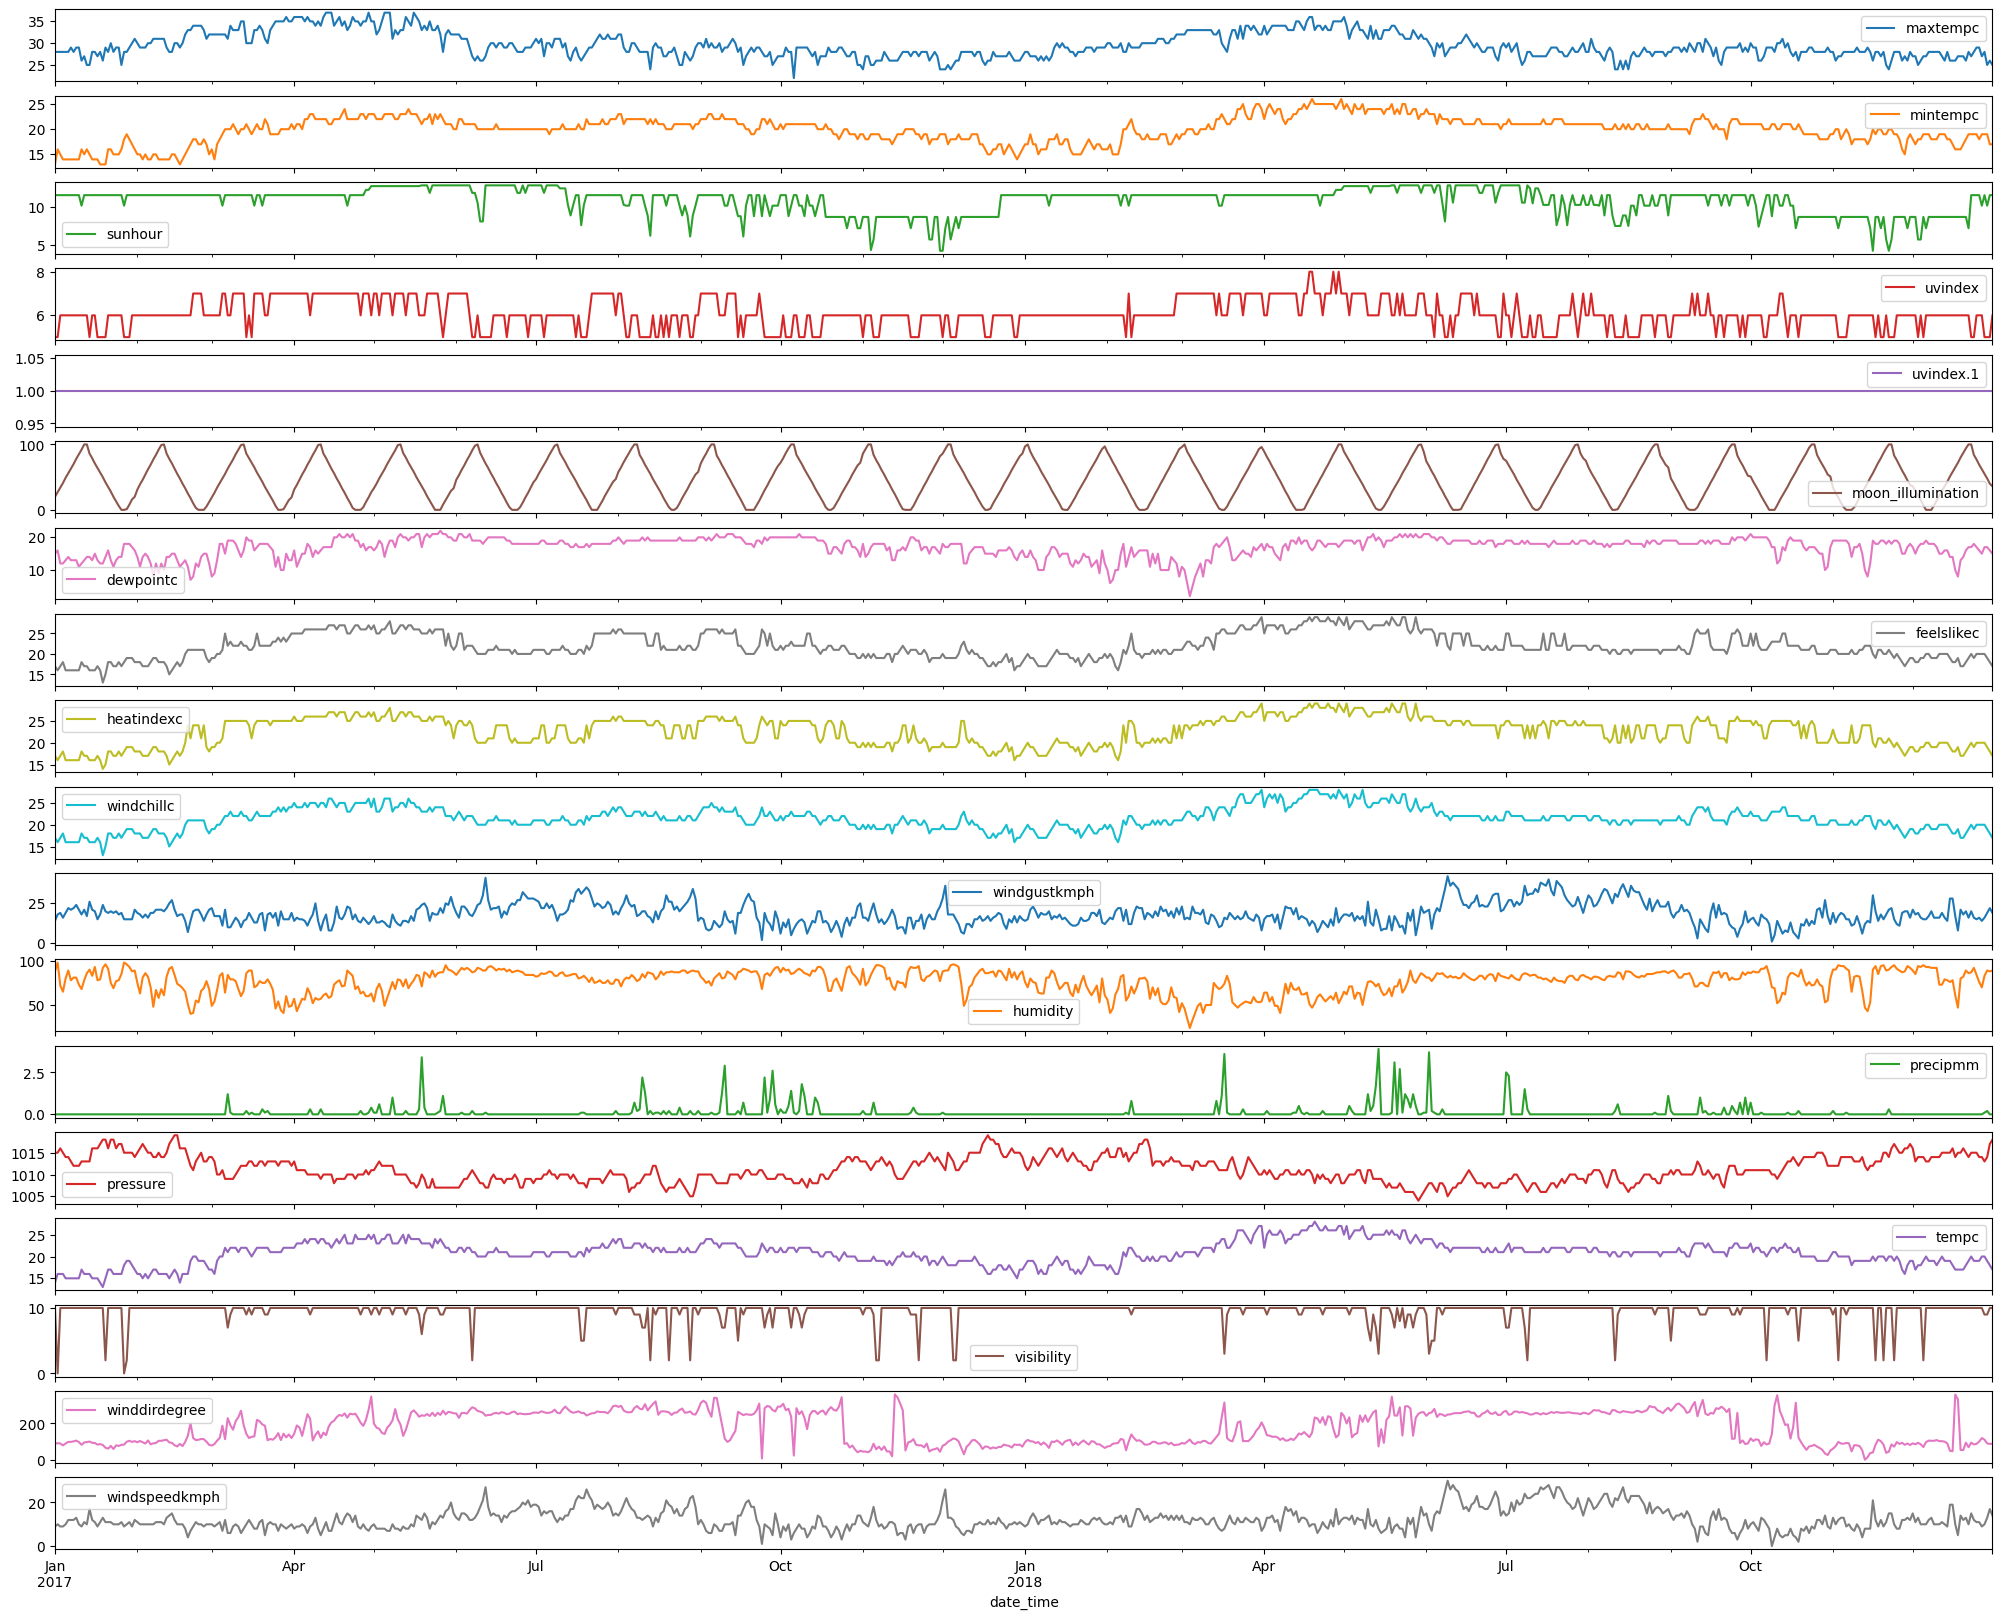

In [18]:
df['2017':'2018'].resample('D').fillna(method='pad').plot(subplots=True, figsize=(25,20))

In [19]:
#Conducting this test to determine d that is differencing order
test_result=adfuller(df['tempc'])
testoutput=pd.Series(test_result[0:4],index=['Test Statistics','p-value','Lags','Number of observation'])

In [20]:
for key,value in test_result[4].items():
    testoutput[key]=value
testoutput

Test Statistics         -7.806361e+00
p-value                  7.263822e-12
Lags                     6.600000e+01
Number of observation    8.758100e+04
1%                      -3.430425e+00
5%                      -2.861573e+00
10%                     -2.566788e+00
dtype: float64

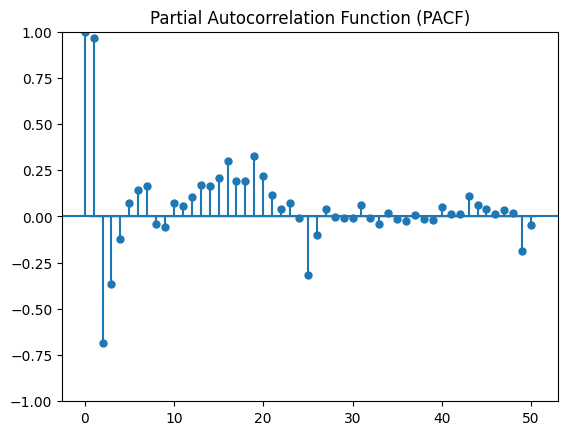

In [21]:
plot_pacf(df.tempc)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

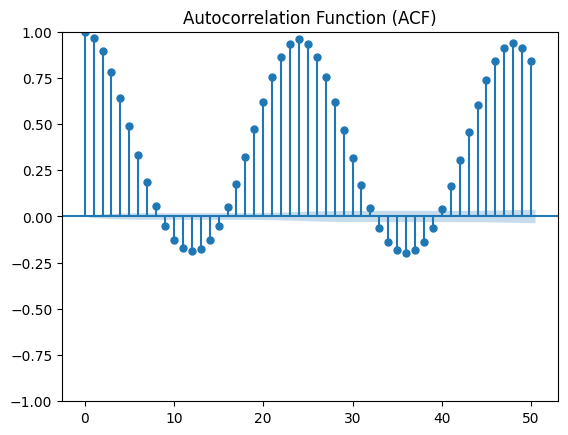

In [22]:
plot_acf(df.tempc)
plt.title('Autocorrelation Function (ACF)')
plt.show()

Finding Rolling Mean and Rolling Standard Deviation

In [23]:
rolmean=df['2018-12-27 00:00:00':'2018-12-31 23:00:00'].rolling(window=24).mean()
rolstd=df['2018-12-27 00:00:00':'2018-12-31 23:00:00'].rolling(window=24).std()

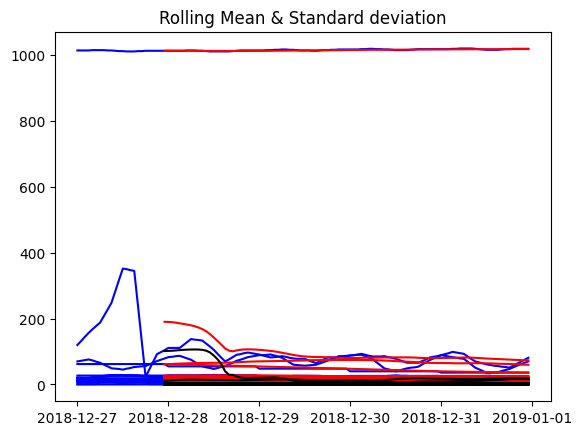

In [24]:
#Plot rolling statistics
orig=plt.plot(df['2018-12-27 00:00:00':'2018-12-31 23:00:00	'],color='blue',label='Original')
mean=plt.plot(rolmean,color='red',label='rolling mean')
std=plt.plot(rolstd,color='black',label='Rolling std')
plt.title('Rolling Mean & Standard deviation')
plt.show()

Function for future forecasting using  ARIMA model

In [25]:

def forecast_feature(historical_series, steps):
    treemodel = ARIMA(historical_series, order=(1,0,1))  # Parameters (p,d,q)
    treemodel_fit = treemodel.fit()
    forecast = treemodel_fit.forecast(steps=steps)
    return forecast

In [26]:
forecast_days = 10  # Forecasting for 1 day
future_dates = [df.index[-1] + timedelta(days=i) for i in range(1, forecast_days + 1)]

Feeding data for Future Forecasting

In [27]:
# Forecast future values for each feature
future_maxtempc = forecast_feature(df['maxtempc'], forecast_days)
future_mintempc = forecast_feature(df['mintempc'], forecast_days)
future_humidity = forecast_feature(df['humidity'], forecast_days)
future_sunhour = forecast_feature(df['sunhour'], forecast_days)
future_heatindexc = forecast_feature(df['heatindexc'], forecast_days)
future_precipmm = forecast_feature(df['precipmm'], forecast_days)
future_pressure = forecast_feature(df['pressure'], forecast_days)
future_windspeedkmph = forecast_feature(df['windspeedkmph'], forecast_days)
future_tempc = forecast_feature(df['tempc'], forecast_days)

C:\Users\Teesha\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
C:\Users\Teesha\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
C:\Users\Teesha\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
C:\Users\Teesha\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
C:\Users\Teesha\AppData\Local\Programs\Python\Python312\

In [28]:
# Gathering Data
future_df = pd.DataFrame({
    'Date': future_dates,
    'maxtempc': future_maxtempc,
    'mintempc': future_mintempc,
    'humidity': future_humidity,
    'sunhour': future_sunhour,
    'heatindexc': future_heatindexc,
    'precipmm': future_precipmm,
    'pressure': future_pressure,
    'windspeedkmph': future_windspeedkmph,
    'tempc':future_tempc
})

In [29]:
future_df

,Date,maxtempc,mintempc,humidity,sunhour,heatindexc,precipmm,pressure,windspeedkmph,tempc
2019-01-01 00:00:00,2019-01-01 23:00:00,25.025735,17.006586,70.917419,11.591957,18.447556,0.019696,1018.767095,11.935933,18.162736
2019-01-01 01:00:00,2019-01-02 23:00:00,25.051399,17.013162,70.727198,11.583953,18.765111,0.041645,1018.488009,11.943188,18.442245
2019-01-01 02:00:00,2019-01-03 23:00:00,25.076921,17.019718,70.543196,11.576025,19.067718,0.052416,1018.218382,11.950155,18.708080
2019-01-01 03:00:00,2019-01-04 23:00:00,25.102301,17.026253,70.365212,11.568172,19.356082,0.057701,1017.957894,11.956846,18.960910
2019-01-01 04:00:00,2019-01-05 23:00:00,25.127541,17.032769,70.193047,11.560393,19.630872,0.060295,1017.706234,11.963272,19.201371
2019-01-01 05:00:00,2019-01-06 23:00:00,25.152641,17.039264,70.026512,11.552688,19.892728,0.061568,1017.463105,11.969443,19.430068
2019-01-01 06:00:00,2019-01-07 23:00:00,25.177602,17.045740,69.865423,11.545056,20.142258,0.062192,1017.228216,11.975370,19.647577
2019-01-01 07:00:00,2019-01-08 23:00:00,25.202424,17.052195,69.709602,11.537497,20.380043,0.062499,1017.001289,11.981062,19.854445
2019-01-01 08:00:00,2019-01-09 23:00:00,25.227110,17.058631,69.558876,11.530009,20.606635,0.062649,1016.782053,11.986528,20.051193
2019-01-01 09:00:00,2019-01-10 23:00:00,25.251658,17.065047,69.413078,11.522593,20.822561,0.062723,1016.570248,11.991778,20.238315


Ploting Forecasted values with Original values

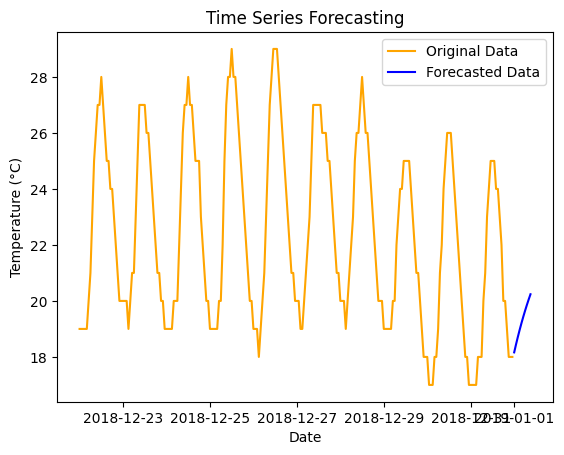

In [38]:
plt.plot(df['2018-12-22 00:00:00':'2018-12-31 23:00:00']['tempc'], label='Original Data', color='orange')
plt.plot(future_df['tempc'], label='Forecasted Data', color='blue')
plt.title('Time Series Forecasting')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

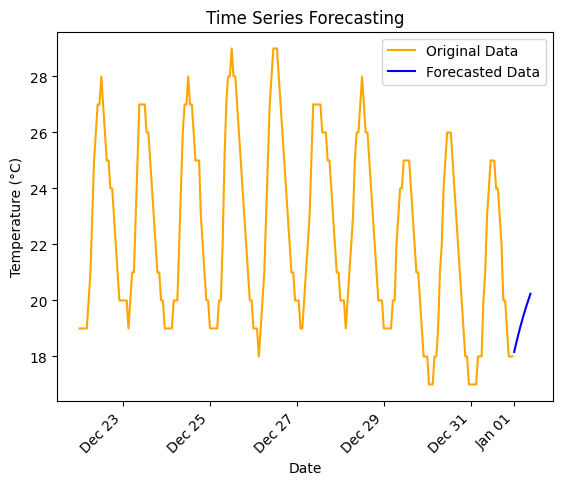

In [42]:
# Filter data for the date range
df1_filtered = df['2018-12-22 00:00:00':'2018-12-31 23:00:00']

fig, ax = plt.subplots()
ax.plot(df1_filtered['tempc'], label='Original Data', color='orange')
ax.plot( future_df['tempc'], label='Forecasted Data', color='blue')

ax.set_title('Time Series Forecasting')
ax.set_xlabel('Date')
ax.set_ylabel('Temperature (°C)')
ax.legend()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.xticks(rotation=45, ha='right')
plt.show()


In [32]:
df2=pd.read_csv(r"bengaluru2019.csv",index_col='date_time')
df2.columns = df2.columns.str.lower()
df2.index = pd.to_datetime(df2.index, format='%d-%m-%Y %H:%M')

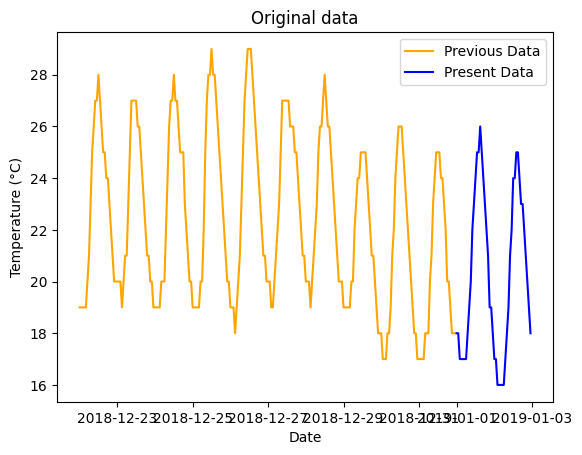

In [33]:
plt.plot(df['2018-12-22 00:00:00':'2018-12-31 23:00:00']['tempc'], label='Previous Data', color='orange')
plt.plot(df2['2019-01-01 00:00:00':'2019-01-02 23:00:00']['tempc'], label='Present Data', color='blue')
plt.title('Original data')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

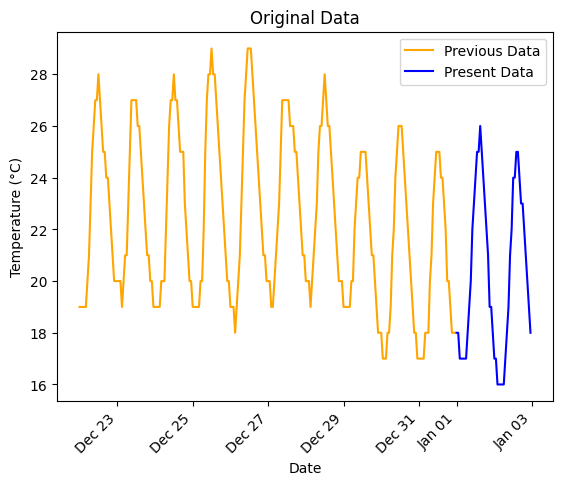

In [43]:
# Filter data for the date range
df1_filtered = df['2018-12-22 00:00:00':'2018-12-31 23:00:00']
df2_filtered = df2['2019-01-01 00:00:00':'2019-01-02 23:00:00']

# Plot with formatted x-axis
fig, ax = plt.subplots()
ax.plot(df1_filtered['tempc'], label='Previous Data', color='orange')
ax.plot(df2_filtered['tempc'], label='Present Data', color='blue')

# Customize x-axis labels
ax.set_title('Original Data')
ax.set_xlabel('Date')
ax.set_ylabel('Temperature (°C)')
ax.legend()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.xticks(rotation=45, ha='right')
plt.show()
